# calculate significance of network overlap

(Note we brought this functionality over from other notebook in previous iteration of analysis)

Now include sampling results for > 500 seeds

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random

print(np.__version__)
print(sns.__version__)
print(nx.__version__)
print(pd.__version__)
import matplotlib
print(matplotlib.__version__)

from IPython.display import display

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set(font_scale=1.4)

sns.set_style('white')

sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})
plt.rcParams['svg.fonttype'] = 'none'

import sys

# % matplotlib inline

1.21.2
0.11.2
2.6.3
1.3.3
3.4.3


In [2]:
import sys
sys.path.append('/Users/brinrosenthal/Documents/GitHub/NetColoc/netcoloc/')

# import netprop_zscore
# import network_prop
from netcoloc import network_colocalization

#import imp
# imp.reload(netprop_zscore)
# imp.reload(network_prop)
#imp.reload(network_colocalization)

# Load the background interactome (PCNet)

In [3]:
import ndex2
interactome_uuid='4de852d9-9908-11e9-bcaf-0ac135e8bacf'
ndex_server='public.ndexbio.org'
ndex_user=None
ndex_password=None
G_PC = ndex2.create_nice_cx_from_server(
            ndex_server, 
            username=ndex_user, 
            password=ndex_password, 
            uuid=interactome_uuid
        ).to_networkx()
nodes = list(G_PC.nodes)

# print out interactome num nodes and edges for diagnostic purposes
print('number of nodes:')
print(len(G_PC.nodes))
print('\nnumber of edges:')
print(len(G_PC.edges))

number of nodes:
18820

number of edges:
2693250


In [4]:
pc_nodes = list(G_PC.nodes)

# Load zscores and seed genes

In [5]:
# set some parameters
ratThresh='relaxed' # relaxed or stringent

num_reps=1000

# set type of gene mapper
mapper = 'PASCAL' # can be PASCAL or PREDIXCAN

adj_type = 'bonf' # can be bonf or BH
# bonf_p = .05/len(BMI_GIANT_pascal) #0.25/len(BMI_GIANT_pascal)
# print(bonf_p)

excl_rat_seeds = False # if true, exclude rat seed genes from relevant phenotype

In [ ]:
# load human seed genes

BMI_GIANT_pascal = pd.read_csv('/Users/brinrosenthal/Documents/CCBB_tickets_data/GIANT_genomics/BMI/GIANT_BMI_pascal.sum.genescores.txt',
                              sep='\t')
BMI_GIANT_pascal.index=BMI_GIANT_pascal['gene_symbol']
BMI_GIANT_pascal = BMI_GIANT_pascal.loc[list(np.intersect1d(BMI_GIANT_pascal.index.tolist(),pc_nodes))]
bonf_p = .05/len(BMI_GIANT_pascal)

seed_bin_human_BMI = BMI_GIANT_pascal[BMI_GIANT_pascal['pvalue']<bonf_p].index.tolist()

print(len(seed_bin_human_BMI))

In [6]:
height_GIANT_pascal = pd.read_csv('/Users/brinrosenthal/Documents/CCBB_tickets_data/GIANT_genomics/standing_height/GIANT_standing_height_pascal.sum.genescores.txt',
                              sep='\t')
height_GIANT_pascal.index=height_GIANT_pascal['gene_symbol']
height_GIANT_pascal = height_GIANT_pascal.loc[list(np.intersect1d(height_GIANT_pascal.index.tolist(),pc_nodes))]
bonf_p = .05/len(height_GIANT_pascal)

seed_bin_human_height = height_GIANT_pascal[height_GIANT_pascal['pvalue']<bonf_p].index.tolist()
print(len(seed_bin_human_height))

seed_bin_human_AR=pd.read_csv('seed_genes/humanAR_seed_'+mapper+'_'+adj_type+'_exclRatSeeds'+str(excl_rat_seeds)+ratThresh+'.txt',
                                     sep='\t')['0'].tolist()
print(len(seed_bin_human_AR))

seed_bin_human_BP1=pd.read_csv('seed_genes/humanBP1_seed_'+mapper+'_'+adj_type+'_exclRatSeeds'+str(excl_rat_seeds)+ratThresh+'.txt',
                                     sep='\t')['0'].tolist()
print(len(seed_bin_human_BP1))

seed_bin_human_BP4=pd.read_csv('seed_genes/humanBP4_seed_'+mapper+'_'+adj_type+'_exclRatSeeds'+str(excl_rat_seeds)+ratThresh+'.txt',
                                     sep='\t')['0'].tolist()
print(len(seed_bin_human_BP4))


# RBC_width_pascal = pd.read_csv('/Users/brinrosenthal/Documents/CCBB_tickets_data/UKBB_sumstats/rbc_dist_width/rbc_dist_width_pascal.sum.genescores.txt',
#                               sep='\t') 
# RBC_width_pascal.index=RBC_width_pascal['gene_symbol']
# RBC_width_pascal = RBC_width_pascal.loc[list(np.intersect1d(RBC_width_pascal.index.tolist(),pc_nodes))]
# bonf_p = .05/len(RBC_width_pascal)
# seed_bin_human_RBC_width = RBC_width_pascal[RBC_width_pascal['pvalue']<bonf_p].index.tolist()
# print(len(seed_bin_human_RBC_width))

# load rat seed genes
seed_bin_rat_BL=pd.read_csv('seed_genes/ratBL_seed_'+ratThresh+'.txt',sep='\t')['0'].tolist()
print(len(seed_bin_rat_BL))

seed_bin_rat_BMI=pd.read_csv('seed_genes/ratBMI_seed_'+ratThresh+'.txt',sep='\t')['0'].tolist()
print(len(seed_bin_rat_BMI))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/brinrosenthal/Documents/CCBB_tickets_data/GIANT_genomics/BMI/GIANT_BMI_pascal.sum.genescores.txt'

In [ ]:
print(', '.join(seed_bin_human_BMI))

In [ ]:
# load human z-score results

# --- Load the sampled results -- only human BMI, height, rbc_width had > 500 seed genes and needed the sampling approach
z_human_bin_BMI_df=pd.read_csv('netprop_zscores_NEW/z_human_bin_BMI_SAMPLED_500_100_weighted.tsv',sep='\t',
                            index_col='Unnamed: 0')


z_human_bin_height_df=pd.read_csv('netprop_zscores_NEW/z_human_bin_Height_SAMPLED_500_100_weighted.tsv',sep='\t',
                            index_col='Unnamed: 0')

out_name = 'human_AR_'+mapper+'_'+adj_type+'_exclRatSeeds'+str(excl_rat_seeds)+ratThresh
z_human_bin_AR=pd.read_csv('netprop_zscores_NEW/z_'+out_name+'_'+str(num_reps)+'_reps.tsv',sep='\t',
                            index_col='gene',names=['gene','z'])

out_name = 'human_BP1_'+mapper+'_'+adj_type+'_exclRatSeeds'+str(excl_rat_seeds)+ratThresh
z_human_bin_BP1=pd.read_csv('netprop_zscores_NEW/z_'+out_name+'_'+str(num_reps)+'_reps.tsv',sep='\t',
                            index_col='gene',names=['gene','z'])

out_name = 'human_BP4_'+mapper+'_'+adj_type+'_exclRatSeeds'+str(excl_rat_seeds)+ratThresh
z_human_bin_BP4=pd.read_csv('netprop_zscores_NEW/z_'+out_name+'_'+str(num_reps)+'_reps.tsv',sep='\t',
                            index_col='gene',names=['gene','z'])

z_human_bin_RBC_width=pd.read_csv('netprop_zscores_NEW/z_'+out_name+'_'+str(num_reps)+'_reps.tsv',sep='\t',
                            index_col='gene',names=['gene','z'])

# load rat results
out_name = 'rat_BMI_'+ratThresh
z_rat_BMI=pd.read_csv('netprop_zscores_NEW/z_'+out_name+'_'+str(num_reps)+'_reps.tsv',sep='\t',
                      index_col='gene',names=['gene','z'])
z_rat_BMI.head()

out_name = 'rat_BL_'+ratThresh
z_rat_BL=pd.read_csv('netprop_zscores_NEW/z_'+out_name+'_'+str(num_reps)+'_reps.tsv',sep='\t',
                      index_col='gene',names=['gene','z'])
z_rat_BL.head()

In [ ]:
# print out rat_BMI_network_genes for TSEA analysis
rat_BMI_network_genes = z_rat_BMI[z_rat_BMI['z']>3]
print(len(rat_BMI_network_genes))
print('\n'.join(rat_BMI_network_genes.index.tolist()))

In [ ]:
z_human_bin_height_df.loc[seed_bin_human_height].sort_values('0',ascending=False).head(25)

In [ ]:
# compute the 75th percentile of sampled genes... approximates the consensus
z_human_bin_BMI=pd.DataFrame({'z':z_human_bin_BMI_df.quantile(q=.75,axis=1)})
z_human_bin_BMI.head()

z_human_bin_height=pd.DataFrame({'z':z_human_bin_height_df.quantile(q=.75,axis=1)})

# z_human_bin_RBC_width=pd.DataFrame({'z':z_human_bin_RBC_width_df.quantile(q=.5,axis=1)})
# z_human_bin_RBC_width=pd.DataFrame({'z':z_human_bin_RBC_width_df.mean(axis=1)})
# # z_human_bin_RBC_width=pd.DataFrame({'z':z_human_bin_RBC_width_df['0']})
# z_human_bin_RBC_width.head()

In [ ]:
# print out human_BMI_network_genes for TSEA analysis
human_BMI_network_genes = z_human_bin_BMI[z_human_bin_BMI['z']>3]
print(len(human_BMI_network_genes))
print('\n'.join(human_BMI_network_genes.index.tolist()))

In [ ]:
print(np.sum(z_human_bin_BMI['z']>2))
print(np.sum(z_human_bin_height['z']>2))





# Compute network overlap

In [ ]:
# function to return significant digits in exp form
def nsf(num, n=1):
    """n-Significant Figures"""
    numstr = ("{0:.%ie}" % (n-1)).format(num)
    return float(numstr)


In [ ]:
from scipy.stats import hypergeom
from scipy.stats import norm

preserve_topology=False

z_dict = {'hBMI':z_human_bin_BMI,'hHeight':z_human_bin_height,
          'rBMI':z_rat_BMI,'rBL':z_rat_BL,
          'hAR':z_human_bin_AR,'hBP1':z_human_bin_BP1,
          'hBP4':z_human_bin_BP4,'hRBC_width':z_human_bin_RBC_width}

seed_dict = {'hBMI':seed_bin_human_BMI,'hHeight':seed_bin_human_height,
             'rBMI':seed_bin_rat_BMI,'rBL':seed_bin_rat_BL,
             'hAR':seed_bin_human_AR,'hBP1':seed_bin_human_BP1,
             'hBP4':seed_bin_human_BP4,'hRBC_width':seed_bin_human_RBC_width}


# save the num overlap and overlap p-val in dataframes

focal_diseases = ['rBMI','rBL','hAR','hBMI','hHeight','hBP4','hBP1']

network_num_overlap = pd.DataFrame(np.zeros((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_num_overlap.columns = focal_diseases

network_obs_exp = pd.DataFrame(np.zeros((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_obs_exp.columns = focal_diseases

network_pval_overlap = pd.DataFrame(np.ones((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_pval_overlap.columns = focal_diseases

network_exp_mean_overlap = pd.DataFrame(np.ones((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_exp_mean_overlap.columns = focal_diseases

network_exp_std_overlap = pd.DataFrame(np.ones((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_exp_std_overlap.columns = focal_diseases


zthresh=3
for i in [0,1]: #np.arange(len(focal_diseases)-1):
    for j in np.arange(1+i,len(focal_diseases)):
        d1=focal_diseases[i]
        d2=focal_diseases[j]
        
        seed1 = seed_dict[d1]
        seed2 = seed_dict[d2]
        
        
        z1=z_dict[d1]
        z1_noseeds = z1.drop(list(np.intersect1d(seed1+seed2,z1.index.tolist())))
        z2=z_dict[d2]
        z2_noseeds = z2.drop(list(np.intersect1d(seed1+seed2,z2.index.tolist())))

        
        # results without excluding seeds
        if preserve_topology==False:
            z_d1d2_size,high_z_rand=network_colocalization.calculate_expected_overlap(z1['z'],z2['z'],d1,d2,
                                                               plot=False,num_reps=100,z_score_threshold=zthresh,
                                                                                     z1_threshold=1.0,
                                                                                     z2_threshold=1.0)
                                                                                               Fnew_rand1,Fnew_rand2,
        ztemp = (z_d1d2_size-np.mean(high_z_rand))/np.std(high_z_rand)
        ptemp = norm.sf(ztemp)
        print(d1+' + '+d2+'\ninclude seeds')
        print('overlapping seeds = '+str(len(np.intersect1d(seed1,seed2))))
        print(z_d1d2_size)
        obs_exp_temp = float(z_d1d2_size)/np.mean(high_z_rand)
        print(obs_exp_temp)
        print(ptemp)
        
        print('\n')
        
        
        
        network_num_overlap.loc[d1][d2]=z_d1d2_size
        network_num_overlap.loc[d2][d1]=z_d1d2_size

        network_pval_overlap.loc[d1][d2]=ptemp
        network_pval_overlap.loc[d2][d1]=ptemp
        
        network_obs_exp.loc[d1][d2]=obs_exp_temp
        network_obs_exp.loc[d2][d1]=obs_exp_temp
        
        network_exp_mean_overlap.loc[d1][d2]=np.mean(high_z_rand)
        network_exp_mean_overlap.loc[d2][d1]=np.mean(high_z_rand)
        
        network_exp_std_overlap.loc[d1][d2]=np.std(high_z_rand)
        network_exp_std_overlap.loc[d2][d1]=np.std(high_z_rand)
        

        

In [ ]:
network_obs_exp.head()

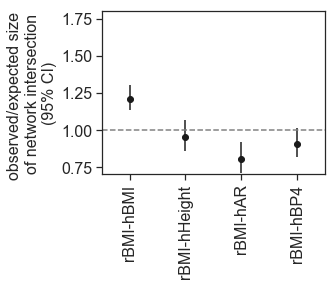

In [63]:
# plot the BMI overlap
xlabels = []
observed_overlap_list=[]
mean_exp_overlap_list=[]
std_exp_overlap_list=[]
for di in ['rBMI']: #range(len(focal_diseases)-1): #[0]: #
    for dj in ['hBMI','hHeight','hAR','hBP4']:
        #di = focal_diseases[i]
        #dj = focal_diseases[j]
        xlabels.append(di+'-'+dj)
        observed_overlap_list.append(network_num_overlap.loc[di][dj])
        mean_exp_overlap_list.append(network_exp_mean_overlap.loc[di][dj])
        std_exp_overlap_list.append(network_exp_std_overlap.loc[di][dj])
        
obs_div_exp_list = np.divide(observed_overlap_list,mean_exp_overlap_list)
# change to 95% confidence interval (*1.96 sigma)
yerr_lower =  np.subtract(obs_div_exp_list,np.divide(observed_overlap_list,np.add(mean_exp_overlap_list,1.96*np.array(std_exp_overlap_list))))
yerr_upper = np.subtract(np.divide(observed_overlap_list,np.subtract(mean_exp_overlap_list,1.96*np.array(std_exp_overlap_list))),obs_div_exp_list)

log_yerr_lower = np.subtract(np.log2(obs_div_exp_list),np.log2(np.divide(observed_overlap_list,np.add(mean_exp_overlap_list,2*np.array(std_exp_overlap_list)))))
log_yerr_upper = np.subtract(np.log2(np.divide(observed_overlap_list,np.subtract(mean_exp_overlap_list,2*np.array(std_exp_overlap_list)))),np.log2(obs_div_exp_list))

log_obs_div_exp=np.log2(obs_div_exp_list)
# log_yerr_lower=np.log2(obs_div_exp_lower_list)
# log_yerr_upper=np.log2(obs_div_exp_upper_list)

network_intersection_df = pd.DataFrame({'name':xlabels,'observed_overlap':observed_overlap_list,
                                       'log2_obs_div_exp':log_obs_div_exp,
                                       'log2_yerr_lower':log_yerr_lower,
                                       'log2_yerr_upper':log_yerr_upper,
                                        'obs_div_exp':obs_div_exp_list,
                                       'yerr_lower':yerr_lower,
                                       'yerr_upper':yerr_upper})
network_intersection_df.index=network_intersection_df['name']

# sort it 
#network_intersection_df=network_intersection_df.sort_values('obs_div_exp',ascending=False)

plt.figure(figsize=(4,3))
plt.errorbar(np.arange(len(network_intersection_df)),network_intersection_df['obs_div_exp'],
             yerr=[network_intersection_df['yerr_lower'],network_intersection_df['yerr_upper']],
             fmt='o',color='k')
tmp=plt.xticks(np.arange(len(observed_overlap_list)),network_intersection_df.index.tolist(),fontsize=16,rotation='vertical')
plt.ylabel('observed/expected size \nof network intersection\n(95% CI)',fontsize=16)
#plt.plot([0,len(obs_div_exp_list)],[0,0],'gray','--')
plt.hlines(1,xmin=-.5,xmax=len(network_intersection_df),color='gray',linestyles='dashed')
plt.ylim([0.7,1.8])
plt.yticks(fontsize=16)
plt.xlim([-.5,len(network_intersection_df)-.5])


# plt.savefig('../figures/rBMI'+ratThresh+'_hBMI_network_overlap_obs_exp_sampling_210615.png',dpi=300,bbox_inches='tight')
# plt.savefig('../figures/rBMI'+ratThresh+'_hBMI_network_overlap_obs_exp_sampling_210615.svg',dpi=300,bbox_inches='tight')


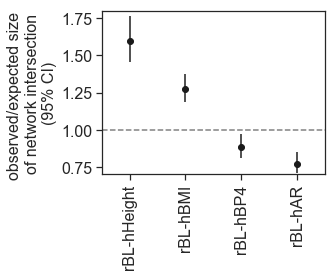

In [64]:
# plot the height overlap
xlabels = []
observed_overlap_list=[]
mean_exp_overlap_list=[]
std_exp_overlap_list=[]
for di in ['rBL']: #range(len(focal_diseases)-1): #[0]: #
    for dj in ['hHeight','hAR','hBP4','hBMI']:
        #di = focal_diseases[i]
        #dj=focal_diseases[j]
        xlabels.append(di+'-'+dj)
        observed_overlap_list.append(network_num_overlap.loc[di][dj])
        mean_exp_overlap_list.append(network_exp_mean_overlap.loc[di][dj])
        std_exp_overlap_list.append(network_exp_std_overlap.loc[di][dj])
        
obs_div_exp_list = np.divide(observed_overlap_list,mean_exp_overlap_list)
# change to 95% confidence interval (*1.96 sigma)
yerr_lower =  np.subtract(obs_div_exp_list,np.divide(observed_overlap_list,np.add(mean_exp_overlap_list,1.96*np.array(std_exp_overlap_list))))
yerr_upper = np.subtract(np.divide(observed_overlap_list,np.subtract(mean_exp_overlap_list,1.96*np.array(std_exp_overlap_list))),obs_div_exp_list)

log_yerr_lower = np.subtract(np.log2(obs_div_exp_list),np.log2(np.divide(observed_overlap_list,np.add(mean_exp_overlap_list,2*np.array(std_exp_overlap_list)))))
log_yerr_upper = np.subtract(np.log2(np.divide(observed_overlap_list,np.subtract(mean_exp_overlap_list,2*np.array(std_exp_overlap_list)))),np.log2(obs_div_exp_list))

log_obs_div_exp=np.log2(obs_div_exp_list)
# log_yerr_lower=np.log2(obs_div_exp_lower_list)
# log_yerr_upper=np.log2(obs_div_exp_upper_list)

network_intersection_df = pd.DataFrame({'name':xlabels,'observed_overlap':observed_overlap_list,
                                       'log2_obs_div_exp':log_obs_div_exp,
                                       'log2_yerr_lower':log_yerr_lower,
                                       'log2_yerr_upper':log_yerr_upper,
                                        'obs_div_exp':obs_div_exp_list,
                                       'yerr_lower':yerr_lower,
                                       'yerr_upper':yerr_upper})
network_intersection_df.index=network_intersection_df['name']

# sort it 
network_intersection_df=network_intersection_df.sort_values('obs_div_exp',ascending=False)

plt.figure(figsize=(4,3))
plt.errorbar(np.arange(len(network_intersection_df)),network_intersection_df['obs_div_exp'],
             yerr=[network_intersection_df['yerr_lower'],network_intersection_df['yerr_upper']],
             fmt='o',color='k')
tmp=plt.xticks(np.arange(len(observed_overlap_list)),network_intersection_df.index.tolist(),fontsize=16,rotation='vertical')
plt.ylabel('observed/expected size \nof network intersection\n(95% CI)',fontsize=16)
#plt.plot([0,len(obs_div_exp_list)],[0,0],'gray','--')
plt.hlines(1,xmin=-.5,xmax=len(network_intersection_df),color='gray',linestyles='dashed')
plt.ylim([0.7,1.8])
plt.yticks(fontsize=16)
plt.xlim([-.5,len(network_intersection_df)-.5])

# plt.savefig('../figures/rBL'+ratThresh+'_hHEIGHT_network_overlap_obs_exp_sampling_210615.png',dpi=300,bbox_inches='tight')
# plt.savefig('../figures/rBL'+ratThresh+'_hHEIGHT_network_overlap_obs_exp_sampling_210615.svg',dpi=300,bbox_inches='tight')


# Make sure we get the same results if we shuffle just one at a time

In [31]:
def calculate_expected_overlap_shuffle1(z_scores_1, z_scores_2, gene_set_name_1='Gene Set 1', gene_set_name_2='Gene Set 2', 
                               z_score_threshold=3, z1_threshold=1.5,z2_threshold=1.5,
                               num_reps=1000, save_random_network_overlap=False): 
    # only shuffle one of the input zscores
    # Build a distribution of expected network overlap sizes by shuffling node names
    random_network_overlap_sizes = []
    z_scores_1_copy = z_scores_1.copy()
    z_scores_2_copy = z_scores_2.copy()
    gene_set_1 = z_scores_1.index.tolist()
    gene_set_2 = z_scores_2.index.tolist()
    for _ in range(num_reps):
        # Shuffle gene name labels
        np.random.shuffle(gene_set_1)
        z_scores_1_copy.index = gene_set_1

        #np.random.shuffle(gene_set_2)
        z_scores_2_copy.index = gene_set_2

        random_size = len(network_colocalization.calculate_network_overlap(z_scores_1_copy, z_scores_2_copy, z_score_threshold=z_score_threshold,
                                                   z1_threshold=z1_threshold,z2_threshold=z2_threshold))
        random_network_overlap_sizes.append(random_size)
        
    network_overlap_size = len(network_colocalization.calculate_network_overlap(z_scores_1, z_scores_2, z_score_threshold=z_score_threshold,
                                                    z1_threshold=z1_threshold,z2_threshold=z2_threshold))

    return network_overlap_size, random_network_overlap_sizes

In [38]:
from scipy.stats import hypergeom
from scipy.stats import norm

preserve_topology=False

z_dict = {'hBMI':z_human_bin_BMI,'hHeight':z_human_bin_height,
          'rBMI':z_rat_BMI,'rBL':z_rat_BL,
          'hAR':z_human_bin_AR,'hBP1':z_human_bin_BP1,
          'hBP4':z_human_bin_BP4,'hRBC_width':z_human_bin_RBC_width}

seed_dict = {'hBMI':seed_bin_human_BMI,'hHeight':seed_bin_human_height,
             'rBMI':seed_bin_rat_BMI,'rBL':seed_bin_rat_BL,
             'hAR':seed_bin_human_AR,'hBP1':seed_bin_human_BP1,
             'hBP4':seed_bin_human_BP4,'hRBC_width':seed_bin_human_RBC_width}

# Fnew_rand_dict = {'hBMI':Fnew_rand_human_bin_BMI,'hHeight':Fnew_rand_human_bin_height,
#              'rBMI':Fnew_rand_rat_bin,'rBL':Fnew_rand_rat_bin_BL,
#              'hAR':Fnew_rand_human_bin_AR,'hBP1':Fnew_rand_human_bin_BP1,
#              'hBP4':Fnew_rand_human_bin_BP4,'hRBC_width':Fnew_rand_human_bin_RBC_width}

# save the num overlap and overlap p-val in dataframes

focal_diseases = ['rBMI','rBL','hAR','hBMI','hHeight','hBP4','hBP1']

network_num_overlap = pd.DataFrame(np.zeros((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_num_overlap.columns = focal_diseases

network_obs_exp = pd.DataFrame(np.zeros((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_obs_exp.columns = focal_diseases

network_pval_overlap = pd.DataFrame(np.ones((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_pval_overlap.columns = focal_diseases

network_exp_mean_overlap = pd.DataFrame(np.ones((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_exp_mean_overlap.columns = focal_diseases

network_exp_std_overlap = pd.DataFrame(np.ones((len(focal_diseases),len(focal_diseases))),index=focal_diseases)
network_exp_std_overlap.columns = focal_diseases


zthresh=3
for i in [0,1]: #np.arange(len(focal_diseases)-1):
    for j in np.arange(1+i,len(focal_diseases)):
        d1=focal_diseases[i]
        d2=focal_diseases[j]
        
        seed1 = seed_dict[d1]
        seed2 = seed_dict[d2]
        
        
        z1=z_dict[d1]
        z1_noseeds = z1.drop(list(np.intersect1d(seed1+seed2,z1.index.tolist())))
        z2=z_dict[d2]
        z2_noseeds = z2.drop(list(np.intersect1d(seed1+seed2,z2.index.tolist())))

        # results without excluding seeds
        if preserve_topology==False:
            z_d1d2_size,high_z_rand=calculate_expected_overlap_shuffle1(z1['z'],z2['z'],d1,d2,
                                                               num_reps=100,z_score_threshold=zthresh,
                                                                                     z1_threshold=1.0,
                                                                                     z2_threshold=1.0)
        ztemp = (z_d1d2_size-np.mean(high_z_rand))/np.std(high_z_rand)
        ptemp = norm.sf(ztemp)
        print(d1+' + '+d2+'\ninclude seeds')
        print('overlapping seeds = '+str(len(np.intersect1d(seed1,seed2))))
        print(z_d1d2_size)
        obs_exp_temp = float(z_d1d2_size)/np.mean(high_z_rand)
        print(obs_exp_temp)
        print(ptemp)
        
        print('\n')
        
        network_num_overlap.loc[d1][d2]=z_d1d2_size
        network_num_overlap.loc[d2][d1]=z_d1d2_size

        network_pval_overlap.loc[d1][d2]=ptemp
        network_pval_overlap.loc[d2][d1]=ptemp
        
        network_obs_exp.loc[d1][d2]=obs_exp_temp
        network_obs_exp.loc[d2][d1]=obs_exp_temp
        
        network_exp_mean_overlap.loc[d1][d2]=np.mean(high_z_rand)
        network_exp_mean_overlap.loc[d2][d1]=np.mean(high_z_rand)
        
        network_exp_std_overlap.loc[d1][d2]=np.std(high_z_rand)
        network_exp_std_overlap.loc[d2][d1]=np.std(high_z_rand)
        

        

rBMI + rBL
include seeds
overlapping seeds = 25
398
1.3135313531353134
9.073575644921723e-12


rBMI + hAR
include seeds
overlapping seeds = 2
191
0.8064856648228687
0.999176941840482


rBMI + hBMI
include seeds
overlapping seeds = 29
657
1.2128260508390096
2.679547744662588e-10


rBMI + hHeight
include seeds
overlapping seeds = 109
265
0.9334930252219248
0.9203870047292061


rBMI + hBP4
include seeds
overlapping seeds = 1
256
0.9089295224569501
0.9636828989728772


rBMI + hBP1
include seeds
overlapping seeds = 2
298
1.0134675554346346
0.40009974459783837


rBL + hAR
include seeds
overlapping seeds = 0
200
0.7810974419058777
0.9997573973805105


rBL + hBMI
include seeds
overlapping seeds = 57
751
1.2750640927689774
1.4841641174172312e-15


rBL + hHeight
include seeds
overlapping seeds = 166
488
1.58041323919943
1.155941353141346e-34


rBL + hBP4
include seeds
overlapping seeds = 9
274
0.8944310243520273
0.9918602797136876


rBL + hBP1
include seeds
overlapping seeds = 12
350
1.085843700

(-0.5, 3.5)

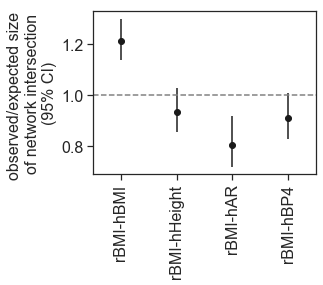

In [39]:
# plot the BMI overlap
xlabels = []
observed_overlap_list=[]
mean_exp_overlap_list=[]
std_exp_overlap_list=[]
for di in ['rBMI']: #range(len(focal_diseases)-1): #[0]: #
    for dj in ['hBMI','hHeight','hAR','hBP4']:
        #di = focal_diseases[i]
        #dj = focal_diseases[j]
        xlabels.append(di+'-'+dj)
        observed_overlap_list.append(network_num_overlap.loc[di][dj])
        mean_exp_overlap_list.append(network_exp_mean_overlap.loc[di][dj])
        std_exp_overlap_list.append(network_exp_std_overlap.loc[di][dj])
        
obs_div_exp_list = np.divide(observed_overlap_list,mean_exp_overlap_list)
# change to 95% confidence interval (*1.96 sigma)
yerr_lower =  np.subtract(obs_div_exp_list,np.divide(observed_overlap_list,np.add(mean_exp_overlap_list,1.96*np.array(std_exp_overlap_list))))
yerr_upper = np.subtract(np.divide(observed_overlap_list,np.subtract(mean_exp_overlap_list,1.96*np.array(std_exp_overlap_list))),obs_div_exp_list)

log_yerr_lower = np.subtract(np.log2(obs_div_exp_list),np.log2(np.divide(observed_overlap_list,np.add(mean_exp_overlap_list,2*np.array(std_exp_overlap_list)))))
log_yerr_upper = np.subtract(np.log2(np.divide(observed_overlap_list,np.subtract(mean_exp_overlap_list,2*np.array(std_exp_overlap_list)))),np.log2(obs_div_exp_list))

log_obs_div_exp=np.log2(obs_div_exp_list)
# log_yerr_lower=np.log2(obs_div_exp_lower_list)
# log_yerr_upper=np.log2(obs_div_exp_upper_list)

network_intersection_df = pd.DataFrame({'name':xlabels,'observed_overlap':observed_overlap_list,
                                       'log2_obs_div_exp':log_obs_div_exp,
                                       'log2_yerr_lower':log_yerr_lower,
                                       'log2_yerr_upper':log_yerr_upper,
                                        'obs_div_exp':obs_div_exp_list,
                                       'yerr_lower':yerr_lower,
                                       'yerr_upper':yerr_upper})
network_intersection_df.index=network_intersection_df['name']

# sort it 
#network_intersection_df=network_intersection_df.sort_values('obs_div_exp',ascending=False)

plt.figure(figsize=(4,3))
plt.errorbar(np.arange(len(network_intersection_df)),network_intersection_df['obs_div_exp'],
             yerr=[network_intersection_df['yerr_lower'],network_intersection_df['yerr_upper']],
             fmt='o',color='k')
tmp=plt.xticks(np.arange(len(observed_overlap_list)),network_intersection_df.index.tolist(),fontsize=16,rotation='vertical')
plt.ylabel('observed/expected size \nof network intersection\n(95% CI)',fontsize=16)
#plt.plot([0,len(obs_div_exp_list)],[0,0],'gray','--')
plt.hlines(1,xmin=-.5,xmax=len(network_intersection_df),color='gray',linestyles='dashed')
# plt.ylim([0.7,1.3])
plt.yticks(fontsize=16)
plt.xlim([-.5,len(network_intersection_df)-.5])

In [36]:
np.mean(high_z_rand)

322.51

# plot netcoloc enrichment vs z-score cutoff (just for BMI)

In [42]:
focal_diseases

['rBMI', 'rBL', 'hAR', 'hBMI', 'hHeight', 'hBP4', 'hBP1']

In [54]:
netcoloc_enrichment_list = []
netcoloc_p_list = []
netcoloc_num_overlap_list = []
zlist = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
for zthresh in zlist:
    d1='rBMI'
    d2='hBMI'

    seed1 = seed_dict[d1]
    seed2 = seed_dict[d2]


    z1=z_dict[d1]
    z1_noseeds = z1.drop(list(np.intersect1d(seed1+seed2,z1.index.tolist())))
    z2=z_dict[d2]
    z2_noseeds = z2.drop(list(np.intersect1d(seed1+seed2,z2.index.tolist())))

    # results without excluding seeds
    if preserve_topology==False:
        z_d1d2_size,high_z_rand=calculate_expected_overlap_shuffle1(z1['z'],z2['z'],d1,d2,
                                                           num_reps=100,z_score_threshold=zthresh,
                                                                                 z1_threshold=1.0,
                                                                                 z2_threshold=1.0)
    ptemp = norm.sf(ztemp)
    
    netcoloc_enrichment_list.append(float(z_d1d2_size)/np.mean(high_z_rand))
    netcoloc_p_list.append(ptemp)
    netcoloc_num_overlap_list.append(z_d1d2_size)

Text(0, 0.5, 'size of netcoloc intersection')

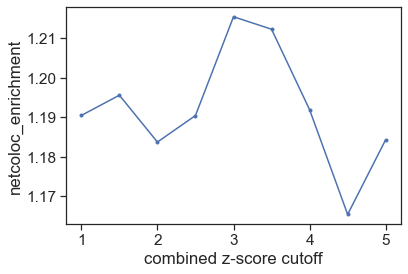

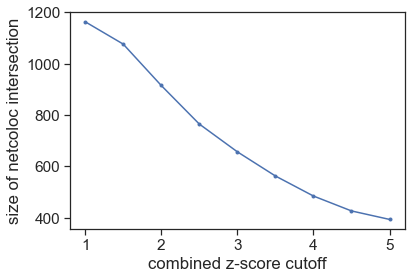

In [56]:
plt.plot(zlist,netcoloc_enrichment_list,'.-')
plt.xlabel('combined z-score cutoff')
plt.ylabel('netcoloc_enrichment')
plt.figure()
plt.plot(zlist,netcoloc_num_overlap_list,'.-')
plt.xlabel('combined z-score cutoff')
plt.ylabel('size of netcoloc intersection')

# export rat only network to cytoscape

In [22]:
d1='rBMI'
d1_genes = z_dict[d1][z_dict[d1]>3].dropna().index.tolist()
G_BMI_rat = nx.subgraph(G_PC,d1_genes)
print(len(G_BMI_rat.nodes()))
print(len(G_BMI_rat.edges()))

522
2393


In [24]:
# write out nodelists and edgelists for overlap
z3_e1,z3_e2 = zip(*list(G_BMI_rat.edges))
edgelist_df = pd.DataFrame()
# add self edges so we don't lose nodes on import
edgelist_df['node1']=list(z3_e1)+list(G_BMI_rat.nodes)
edgelist_df['node2']=list(z3_e2)+list(G_BMI_rat.nodes)
# edgelist_df.to_csv('../cytoscape/BMI/rat_BMI_z3_edges.txt',sep='\t')
print(len(edgelist_df))

# write out nodelist for overlap
node_df = pd.DataFrame(index=G_BMI_rat.nodes())
node_df[d1+'_seeds']=0
# node_df[d2+'_seeds']=0
node_df[d1+'_seeds'].loc[list(np.intersect1d(seed_dict[d1],node_df.index.tolist()))]=1
# node_df[d2+'_seeds'].loc[list(np.intersect1d(seed_dict[d2],node_df.index.tolist()))]=1
node_df['z_'+d1]=z_dict[d1].loc[d1_genes]['z']
# node_df['z_'+d2]=z_dict[d2].loc[d1_genes]['z']
# node_df['z_both']=node_df['z_'+d1]*node_df['z_'+d2]

# node_df.to_csv('../cytoscape/BMI/rat_BMI_z3_nodes.txt',sep='\t')

node_df.head()

2915


,rBMI_seeds,z_rBMI
RNF213,1,8.211388
NR5A2,0,3.397607
KANSL2,0,3.409476
LSP1P3,0,4.366007
SRP14,1,19.551300


# export the shared networks to cytoscape


Note: BMI network is also stored on ndex with UUID = e8cc9239-d91a-11eb-b666-0ac135e8bacf  
Note: Height network is also stored on ndex with UUID = 3c980793-0115-11ec-b666-0ac135e8bacf

In [278]:
d1='hHeight'
d2='rBL'

G_height_overlap = network_colocalization.calculate_network_overlap_subgraph(G_PC,z_dict[d1],
                                                                            z_dict[d2],z12thresh=1.0)
print(len(list(G_height_overlap.nodes)))
overlap_genes = list(G_height_overlap.nodes)
print(len(list(G_height_overlap.edges)))

# write out nodelists and edgelists for overlap
z3_e1,z3_e2 = zip(*list(G_height_overlap.edges))
edgelist_df = pd.DataFrame()
# add self edges so we don't lose nodes on import
edgelist_df['node1']=list(z3_e1)+list(G_height_overlap.nodes)
edgelist_df['node2']=list(z3_e2)+list(G_height_overlap.nodes)
edgelist_df.to_csv('../cytoscape/Height/rat_human_height_sampling_z3_edges.txt',sep='\t')
print(len(edgelist_df))

# write out nodelist for overlap
node_df = pd.DataFrame(index=G_height_overlap.nodes())
node_df[d1+'_seeds']=0
node_df[d2+'_seeds']=0
node_df[d1+'_seeds'].loc[list(np.intersect1d(seed_dict[d1],node_df.index.tolist()))]=1
node_df[d2+'_seeds'].loc[list(np.intersect1d(seed_dict[d2],node_df.index.tolist()))]=1
node_df['z_'+d1]=z_dict[d1].loc[overlap_genes]['z']
node_df['z_'+d2]=z_dict[d2].loc[overlap_genes]['z']
node_df['z_both']=node_df['z_'+d1]*node_df['z_'+d2]

# node_df.to_csv('../cytoscape/Height/rat_human_height_sampling_z3_nodes.txt',sep='\t')
node_df = node_df.sort_values('z_both',ascending=False)
node_df.head()

488
7275
7763


,hHeight_seeds,rBL_seeds,z_hHeight,z_rBL,z_both
BANF1,1,1,2.071313,22.720091,47.060411
CFL1,1,1,1.708518,24.067931,41.120488
SART1,1,1,1.776404,22.623835,40.189081
MAP4,1,1,1.908731,19.798707,37.790401
ELF2,1,1,1.969542,18.767904,36.964177


In [268]:
print(', '.join(overlap_genes))

RIBC2, WDTC1, ABHD17A, R3HDM4, EHBP1L1, NUCB1, BCS1L, ANKRD50, CERS5, TM7SF2, MVD, GLYR1, DOK7, MUS81, CACUL1, SIGMAR1, KBTBD4, SIRT7, SCAMP4, COMMD4, HOXC4, PEX11A, OTUD6A, NPEPPS, RPS6KA4, SCAP, FAM153B, XPO6, CABIN1, ASIC1, NR3C2, POMC, QSOX2, PTOV1, SLC11A2, SF3A2, ZNF827, HARBI1, MAPK8IP1, ELP5, VEGFB, PARP15, APOE, APOC2, ADAMTS10, RPS6KB2, RIPOR1, CCDC184, TEX264, CPZ, NCOR2, GRK6, ARHGAP11B, NDUFB10, TMEM136, CD59, PSMC3, BANF1, LTBP2, ROCK2, TMED1, PDS5B, RAD9A, COX14, DOK2, ETHE1, CAPN1, ALDOA, MRPL11, TYW5, TCEA2, PRRC2C, FAM177A1, SUPT5H, PPP2R5B, LIMA1, OR5M3, BRMS1L, PELI3, ZNF592, TRPC4AP, SNX11, SCFD2, AP5B1, TIGD2, PTPN23, SYVN1, FBXW4, PNPLA6, SLAIN1, SMARCC1, RIPK1, ZFPL1, TMEM256, MRPL43, WDR83OS, AFAP1, TNIP2, DNM2, POLA2, RPS19BP1, PLOD3, FGD5, RNF40, KCNS2, LMAN2L, STK38, TAF10, AP5S1, DHX30, UNC80, DDB2, PYGB, CLCN7, MEA1, CDH2, HMGB3, CDC42SE2, TEX101, SPACA4, NPC1, OR14I1, EFEMP2, ZFP41, KAT5, MAP2K2, ATF6B, FOSL1, TMEM141, ZSWIM6, BAD, MRPL4, TIGD6, SOGA3, TI

In [275]:
d1='hBMI'
d2='rBMI'

G_BMI_overlap = network_colocalization.calculate_network_overlap_subgraph(G_PC,z_dict[d1],
                                                                            z_dict[d2],z12thresh=1.0)
print(len(list(G_BMI_overlap.nodes)))
overlap_genes = list(G_BMI_overlap.nodes)
print(len(list(G_BMI_overlap.edges)))

# write out nodelists and edgelists for overlap
z3_e1,z3_e2 = zip(*list(G_BMI_overlap.edges))
edgelist_df = pd.DataFrame()
# add self edges so we don't lose nodes on import
edgelist_df['node1']=list(z3_e1)+list(G_BMI_overlap.nodes)
edgelist_df['node2']=list(z3_e2)+list(G_BMI_overlap.nodes)
# edgelist_df.to_csv('../cytoscape/BMI/rat_human_BMI_z3_sampling_edges.txt',sep='\t')
print(len(edgelist_df))

# write out nodelist for overlap
node_df = pd.DataFrame(index=G_BMI_overlap.nodes())
node_df[d1+'_seeds']=0
node_df[d2+'_seeds']=0
node_df[d1+'_seeds'].loc[list(np.intersect1d(seed_dict[d1],node_df.index.tolist()))]=1
node_df[d2+'_seeds'].loc[list(np.intersect1d(seed_dict[d2],node_df.index.tolist()))]=1
node_df['z_'+d1]=z_dict[d1].loc[overlap_genes]['z']
node_df['z_'+d2]=z_dict[d2].loc[overlap_genes]['z']
node_df['z_both']=node_df['z_'+d1]*node_df['z_'+d2]

# node_df.to_csv('../cytoscape/BMI/rat_human_BMI_z3_sampling_nodes.txt',sep='\t')
node_df = node_df.sort_values('z_both',ascending=False)
node_df.head()

657
5292
5949


,hBMI_seeds,rBMI_seeds,z_hBMI,z_rBMI,z_both
UBR2,1,1,16.665633,15.029108,250.469601
TNRC6A,1,1,15.070437,13.126106,197.816156
GP2,1,1,15.386866,12.852504,197.759758
AKAP6,1,1,15.348961,12.670404,194.477530
BAIAP2,1,1,12.480816,10.394800,129.735591


In [273]:
node_df.sum()

hBMI_seeds     228.000000
rBMI_seeds     114.000000
z_hBMI        3230.394498
z_rBMI        2428.785166
z_both        9059.780126
dtype: float64

In [274]:
print(', '.join(overlap_genes))

EMILIN2, ABCF3, MYH2, SPINT1, GPR151, UNC13D, GDPD4, NPFFR1, STX7, METTL2B, LYL1, EHBP1, CHST13, TMEM19, CKAP5, IPO7, CDX2, HARS, DDAH1, CACUL1, BDNF, KBTBD4, PRKD1, UHRF1, RASA4, JAM3, ARPP21, CSDE1, COLQ, WNK1, SOX3, NDST2, PURG, GNAI2, ARFGEF2, NPEPPS, PAGR1, VPS18, SLC45A3, C5orf30, BEST2, UNK, POMC, SKIL, SSH3, VPS33A, N4BP2, STK33, SF3A3, GPR152, GYPC, VPS35L, TNIK, SYT15, UBR2, PLD2, MSI2, KLC1, IPO4, SYTL2, SLC25A12, SYT9, PDILT, ARHGAP11B, HPX, EBF3, TUBA4A, THOC6, ST3GAL2, PSMC3, NIN, HNRNPCL2, GNAO1, PLEKHA7, PACSIN2, EIF2AK4, RAD51, PCGF1, CPNE4, OR4X1, KDM6A, WNK4, SEZ6L, MTMR9, ZDHHC21, BAK1, FCHO2, ZFC3H1, OR2A7, SLC16A6, UBE2DNL, CAPN1, CPXM1, MRGPRD, AGAP1, HS3ST2, BEST4, HNF4G, FAM177A1, ATXN7L3, KRT75, CDHR4, INPP4B, NAPRT, SCUBE2, SCFD2, USP34, SH3PXD2A, TSR2, CAVIN4, PTK7, CCDC121, PROM2, PNPLA6, RPH3A, SMARCC1, GANC, TMEM256, CD300LF, NR2F1, VGLL2, SDC3, PKP3, SULT1A2, DNAH14, SOX8, YEATS2, KPNB1, CPNE6, CORIN, SOX5, RAB11FIP2, CAMK4, MROH2A, TAF10, UNC80, ZFPM2, 

# calculate network cosine similarities, to see if we get better clustering

In [148]:
from scipy.spatial import distance
adj_temp = pd.DataFrame(nx.to_numpy_matrix(G_BMI_overlap))
adj_temp.index=G_BMI_overlap.nodes()
adj_temp.columns=G_BMI_overlap.nodes()
adj_temp.head()

,MTMR9,AKT3,DAPK3,RAB5A,DTX4,TRP-AGG2-6,KNSTRN,LMTK2,GPR139,NDST2,...,ZBTB21,HS3ST3B1,ZBTB20,CACNA1D,EHMT1,HMGCR,AFF1,CHST9,CS,AATK
MTMR9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AKT3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DAPK3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RAB5A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
DTX4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
nodelist = list(G_BMI_overlap.nodes)

cos_pc = pd.DataFrame(np.zeros((len(nodelist),len(nodelist))),index=nodelist)
cos_pc.columns=nodelist

counter=-1
for i in np.arange(len(nodelist)-1):
    n1=nodelist[i]
    neigh1 = list(nx.neighbors(G_BMI_overlap,n1))
    counter+=1
    if (counter%50)==0:
        print(counter)
    for j in np.arange(i+1,len(nodelist)):
        n2=nodelist[j]
        neigh2 = list(nx.neighbors(G_BMI_overlap,n2))
        # make sure they have some neighbors
        if len(np.union1d(neigh1,neigh2))>0:
#             j_n1n2 = float(len(np.intersect1d(neigh1,neigh2)))/len(np.union1d(neigh1,neigh2))
            cos_sim_temp = distance.cosine(adj_temp[n1],adj_temp[n2])
        else:
#             j_n1n2=0
            cos_sim_temp=1
        
        
        cos_pc.loc[n1][n2]=cos_sim_temp
        cos_pc.loc[n2][n1]=cos_sim_temp
cos_pc.head()

0


/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


50
100
150
200
250
300
350
400


,MTMR9,AKT3,DAPK3,RAB5A,DTX4,TRP-AGG2-6,KNSTRN,LMTK2,GPR139,NDST2,...,ZBTB21,HS3ST3B1,ZBTB20,CACNA1D,EHMT1,HMGCR,AFF1,CHST9,CS,AATK
MTMR9,0.000000,0.888197,0.911612,1.000000,1.000000,1.0,1.000000,0.795876,1.0,0.927831,...,0.875000,0.927831,0.873000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
AKT3,0.888197,0.000000,0.644244,0.807331,0.841886,1.0,0.940239,1.000000,1.0,1.000000,...,1.000000,1.000000,0.687621,0.782357,0.904654,0.920943,0.908713,1.000000,0.963726,1.0
DAPK3,0.911612,0.644244,0.000000,0.869442,0.750000,1.0,1.000000,1.000000,1.0,1.000000,...,0.911612,1.000000,0.865296,1.000000,0.924622,0.937500,0.927831,1.000000,0.942646,1.0
RAB5A,1.000000,0.807331,0.869442,0.000000,0.825922,1.0,0.934205,1.000000,1.0,1.000000,...,1.000000,1.000000,0.874939,0.960064,1.000000,0.782403,0.949748,0.912961,0.840255,1.0
DTX4,1.000000,0.841886,0.750000,0.825922,0.000000,1.0,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,0.820395,1.000000,1.000000,0.750000,1.000000,1.000000,0.770584,1.0


In [153]:
# Rank transform 1-cos distance
m1cos = 1-cos_pc
m1cos = m1cos.replace(np.nan,0)
sim_names = m1cos.index.tolist()
sim_rank = m1cos.rank(0) / (m1cos.shape[0] - 1)

sim_rank = pd.DataFrame((sim_rank.values + sim_rank.values.T) / 2.0, columns=sim_names, index=sim_names)

# remove self edges
sim_rank.values[[np.arange(sim_rank.shape[0])]*2] = 0

sim_rank.head()

/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


,MTMR9,AKT3,DAPK3,RAB5A,DTX4,TRP-AGG2-6,KNSTRN,LMTK2,GPR139,NDST2,...,ZBTB21,HS3ST3B1,ZBTB20,CACNA1D,EHMT1,HMGCR,AFF1,CHST9,CS,AATK
MTMR9,0.000000,0.806604,0.785377,0.285967,0.376179,0.410967,0.369693,0.988208,0.413325,0.813090,...,0.901533,0.813090,0.836085,0.327830,0.334316,0.314858,0.329599,0.367925,0.310142,0.356722
AKT3,0.806604,0.000000,0.989387,0.902123,0.856132,0.356722,0.683962,0.347877,0.359080,0.312500,...,0.311321,0.312500,0.964623,0.943986,0.740566,0.655660,0.717571,0.313679,0.523585,0.302476
DAPK3,0.785377,0.989387,0.000000,0.836675,0.955189,0.405660,0.364387,0.396816,0.408019,0.361439,...,0.827830,0.361439,0.839033,0.322524,0.742335,0.673349,0.725236,0.362618,0.668632,0.351415
RAB5A,0.285967,0.902123,0.836675,0.000000,0.877948,0.369104,0.712854,0.360259,0.371462,0.324882,...,0.323703,0.324882,0.776533,0.594340,0.292453,0.939269,0.612028,0.754717,0.846698,0.314858
DTX4,0.376179,0.856132,0.955189,0.877948,0.000000,0.459316,0.418042,0.450472,0.461675,0.415094,...,0.413915,0.415094,0.871462,0.376179,0.382665,0.954599,0.377948,0.416274,0.923939,0.405071


In [160]:
# write out sim_rank_edges
ethresh=.5
print((sim_rank>ethresh).sum().sum())
n1list = []
n2list = []
wlist = []
nodelist=sim_rank.index.tolist()
for i in np.arange(len(sim_rank)-1):
    for j in np.arange(i+1,len(sim_rank)):
        n1=nodelist[i]
        n2=nodelist[j]
        w=sim_rank.loc[n1][n2]
        if w>ethresh:
            n1list.append(n1)
            n2list.append(n2)
            wlist.append(w)
            
print(len(n1list))

42804
21402


In [161]:
pd.DataFrame({'n1':n1list,'n2':n2list,'w':wlist}).to_csv('../cytoscape/BMI/edgelist_simrank_p5.txt',sep='\t')